In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('datasets_15919_21036_insurance.csv')

In [3]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
dataset.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [5]:
dataset.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [6]:
import seaborn as sns

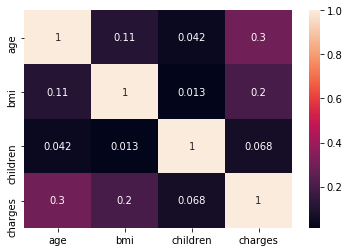

In [7]:
sns.heatmap(dataset.corr(),annot=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
dataset['sex']=lb.fit_transform(dataset['sex'])
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [9]:
dataset['smoker']=lb.fit_transform(dataset['smoker'])
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [10]:
dataset['region']=lb.fit_transform(dataset['region'])
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [11]:
x=dataset.iloc[:,0:6].values

In [12]:
x

array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ,  3.  ],
       [18.  ,  1.  , 33.77,  1.  ,  0.  ,  2.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  0.  ,  2.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  0.  ,  2.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  0.  ,  3.  ],
       [61.  ,  0.  , 29.07,  0.  ,  1.  ,  1.  ]])

In [13]:
y=dataset.iloc[:,6:].values
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [14]:
x.shape

(1338, 6)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
x_train.shape

(1070, 6)

In [17]:
from sklearn.linear_model import LinearRegression 
mr=LinearRegression()

In [18]:
mr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
import pickle
pickle.dump(mr,open('test.pkl','wb'))

In [20]:
y_predict=mr.predict(x_test)
y_predict

array([[ 1.10172305e+04],
       [ 9.78753017e+03],
       [ 3.79947821e+04],
       [ 1.61227784e+04],
       [ 6.93075923e+03],
       [ 3.96902046e+03],
       [ 1.55178430e+03],
       [ 1.42832091e+04],
       [ 8.95342886e+03],
       [ 7.43194558e+03],
       [ 4.54457668e+03],
       [ 1.02472753e+04],
       [ 8.65710757e+03],
       [ 4.12619770e+03],
       [ 2.78113171e+04],
       [ 1.10395971e+04],
       [ 1.12514458e+04],
       [ 6.03101003e+03],
       [ 8.17339252e+03],
       [ 2.70394424e+04],
       [ 3.35778484e+04],
       [ 1.42670864e+04],
       [ 1.16850232e+04],
       [ 3.24069403e+04],
       [ 4.41465153e+03],
       [ 9.14607182e+03],
       [ 1.12786921e+03],
       [ 1.00891473e+04],
       [ 4.08782973e+03],
       [ 1.03569127e+04],
       [ 8.96224058e+03],
       [ 4.02452861e+04],
       [ 1.54779185e+04],
       [ 1.36671353e+04],
       [ 2.47415217e+04],
       [ 5.13005676e+03],
       [ 1.28428861e+04],
       [ 3.05264017e+04],
       [ 3.3

In [21]:
from sklearn.metrics import r2_score

In [22]:
r2_score(y_test,y_predict)

0.799874714544996